In [3]:
using Plots
using Distributions
using SpecialFunctions  # Add this to access the gamma function

In [4]:
include("distributions/Nakagami.jl")

fit_mle (generic function with 62 methods)

In [5]:
# Generate or import your small scale fading data
# Example: fadingData = randn(1000); # Replace this with your actual data
fadingData = randn(1000)

# Ensure data is non-negative for Nakagami distribution
fadingData = abs.(fadingData);

In [6]:
x = range(minimum(fadingData), stop=maximum(fadingData), length=100);

In [7]:
# Fit Rayleigh distribution
rayleighDist = fit_mle(Rayleigh, fadingData)
pdf_rayleigh = pdf.(rayleighDist, x);

In [8]:
# Fit Ricean distribution
# Using a rough approximation for initial parameters
s = √(mean(fadingData.^2) / 2) # Approximate s
σ = std(fadingData) # Approximate σ
riceanDist = Rician(s, σ)
pdf_ricean = pdf.(riceanDist, x);

In [9]:
# Fit Nakagami distribution
nakagamiDist = fit_mle(Nakagami, fadingData)
pdf_nakagami = pdf.(nakagamiDist, x);

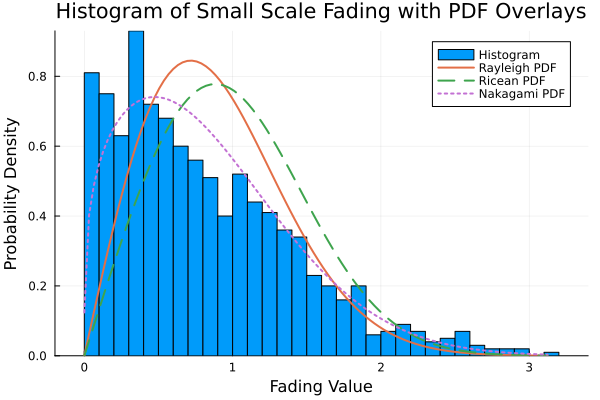

In [10]:
# Plot the histogram of the fading data
plot(
      title = "Histogram of Small Scale Fading with PDF Overlays"
    , xlabel = "Fading Value", ylabel = "Probability Density"
)
histogram!(fadingData, normalize=true, bins=50, label="Histogram", legend=:topright)
plot!(x, pdf_rayleigh, label="Rayleigh PDF", linewidth=2)
plot!(x, pdf_ricean, label="Ricean PDF", linewidth=2, linestyle=:dash)
plot!(x, pdf_nakagami, label="Nakagami PDF", linewidth=2, linestyle=:dot)


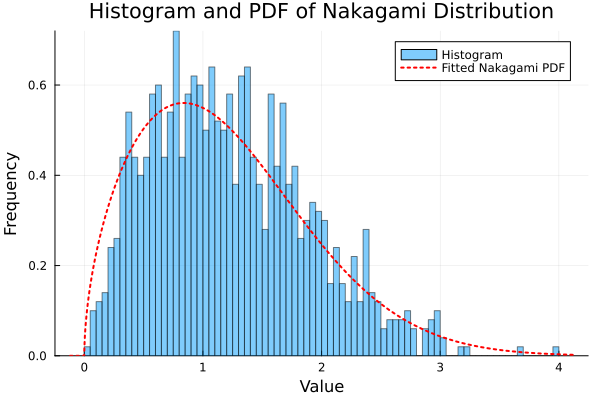

In [11]:
# Generate Nakagami-distributed data
μ = 1.0  # Shape parameter
ω = 2.0  # Spread parameter
nakagami_dist = Nakagami(μ, ω)
data = rand(nakagami_dist, 1000)

# Plot the histogram of the data
histogram(data, bins=100, label="Histogram", xlabel="Value", ylabel="Frequency", title="Histogram and PDF of Nakagami Distribution", alpha=0.5, normalize=true)

# Overlay the fitted PDF
x = range(0, maximum(data), length=1000)

# Fit Nakagami distribution to the data
nakagami_fit = fit(Nakagami, data)
plot!(x -> pdf(nakagami_fit, x)
    , label="Fitted Nakagami PDF"
    , linewidth=2, linestyle=:dot
    , color=:red
)

In [19]:
x = randn(1000)  # Example random data
rx_power_dBm = 20  # Example value for received power in dBm

# Calculate Y2
Y2 = x .- rx_power_dBm .+ 30

# Reshape Y2 to a column vector 
Y2 = vec(Y2)

# Fit Nakagami distribution
μ = 1.0  # Shape parameter
ω = 2.0  # Spread parameter
nakagami_dist = Nakagami(μ, ω)

# Fit and plot Nakagami distribution
nakagami_fit = fit(nakagami_dist, Y2)
plot!(x -> pdf(nakagami_fit, x)
    , label="Nakagami"
    , linewidth=2, linestyle=:dot
)


LoadError: MethodError: no method matching fit(::Nakagami{Float64}, ::Vector{Float64})

[0mClosest candidates are:
[0m  fit([91m::Type{StatsBase.ZScoreTransform}[39m, ::AbstractVector{<:Real}; dims, center, scale)
[0m[90m   @[39m [35mStatsBase[39m [90m~/.julia/packages/StatsBase/XgjIN/src/[39m[90m[4mtransformations.jl:130[24m[39m
[0m  fit([91m::Type{StatsBase.Histogram{T}}[39m, ::AbstractVector, [91m::StatsBase.AbstractWeights[39m; closed, nbins) where T
[0m[90m   @[39m [35mStatsBase[39m [90m~/.julia/packages/StatsBase/XgjIN/src/[39m[90m[4mhist.jl:304[24m[39m
[0m  fit([91m::Type{StatsBase.Histogram{T}}[39m, ::AbstractVector, [91m::AbstractVector[39m; closed) where T
[0m[90m   @[39m [35mStatsBase[39m [90m~/.julia/packages/StatsBase/XgjIN/src/[39m[90m[4mhist.jl:298[24m[39m
[0m  ...
